# Backpropagation and the MLP
From: https://rolisz.ro/2013/04/18/neural-networks-in-python/

## Loading the packages

In [1]:
import numpy as np
import matplotlib.pyplot as pl

## The Dataset
The following script allows you to create a 2D dataset by using the mouse. The left click adds points belonging to class A (blue), and the right click adds points belonging to class B (red). You can create as many points as you desire. The final dataset will contain hence three values per point: x coordinate (-1 ≤ x ≤ 1), y coordinate (-1 ≤ y ≤ 1) and the class ∈ {1,-1}.

<IPython.core.display.Javascript object>


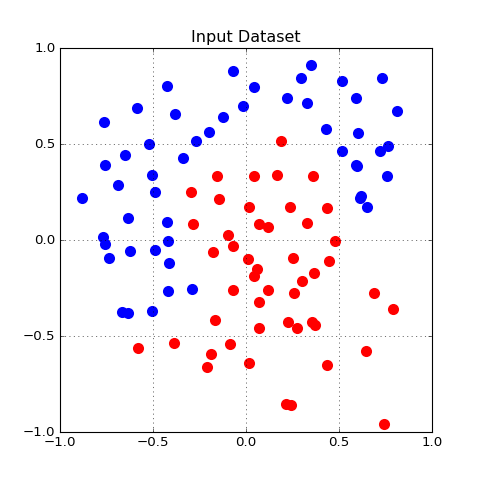

In [2]:
%matplotlib notebook

fig = pl.figure(figsize=(6,6))
pl.title("Input Dataset")
pl.xlim((-1.2,1.2))
pl.ylim((-1.2,1.2))

dataset = []

def onclick(event):
    global dataset
    cx = event.xdata
    cy = event.ydata
    co = event.button
    dataset.append((cx, cy, co-2))

    pl.scatter(cx, cy, c=(['b', 'r'])[co > 2], s=100, lw=0)
    pl.grid(True)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [3]:
fig.canvas.mpl_disconnect(onclick)

## Show the dataset

In [4]:
dataset = np.array(dataset)
dataset

array([[-0.50588038, -0.37019857, -1.        ],
       [-0.29082661, -0.25561523, -1.        ],
       [-0.73706317, -0.0941569 , -1.        ],
       [-0.75856855, -0.02124023, -1.        ],
       [-0.48975134, -0.05249023, -1.        ],
       [-0.42523522,  0.0933431 , -1.        ],
       [-0.48975134,  0.2495931 , -1.        ],
       [-0.50588038,  0.33813477, -1.        ],
       [-0.68867608,  0.28605143, -1.        ],
       [-0.76394489,  0.61417643, -1.        ],
       [-0.58652554,  0.6870931 , -1.        ],
       [-0.38222446,  0.6558431 , -1.        ],
       [-0.26932124,  0.5152181 , -1.        ],
       [-0.33921371,  0.42667643, -1.        ],
       [-0.52200941,  0.4995931 , -1.        ],
       [-0.65104167,  0.44230143, -1.        ],
       [-0.75856855,  0.3902181 , -1.        ],
       [-0.88222446,  0.2183431 , -1.        ],
       [-0.76932124,  0.0152181 , -1.        ],
       [-0.63491263,  0.11417643, -1.        ],
       [-0.62415995, -0.05769857, -1.   

## The MLP
The class presented here was adapted from the code found at: https://rolisz.ro/2013/04/18/neural-networks-in-python/

The class implements a MLP with a fully configurable number of layers and neurons. It adapts its weights using the backpropagation algorithm in an online manner.

In [5]:
class MLP:
    """
    This code was adapted from:
    https://rolisz.ro/2013/04/18/neural-networks-in-python/
    """
    def __tanh(self, x):
        return np.tanh(x)

    def __tanh_deriv(self, a):
        return 1.0 - a**2

    def __logistic(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def __logistic_derivative(self, a):
        return a * ( 1 - a )
    
    def __init__(self, layers, activation='tanh'):
        """
        :param layers: A list containing the number of units in each layer.
        Should be at least two values
        :param activation: The activation function to be used. Can be
        "logistic" or "tanh"
        """
        if activation == 'logistic':
            self.activation = self.__logistic
            self.activation_deriv = self.__logistic_derivative
        elif activation == 'tanh':
            self.activation = self.__tanh
            self.activation_deriv = self.__tanh_deriv

        self.weights = []
        for i in range(1, len(layers) - 1):
            self.weights.append((2 * np.random.random((layers[i - 1] + 1, layers[i] + 1)) - 1) * 0.25)
        self.weights.append((2 * np.random.random((layers[i] + 1, layers[i + 1])) - 1) * 0.25)
    
    def fit(self, X, y, learning_rate=0.1, epochs=100):
        """
        Online learning.
        :param X: Input data or features
        :param y: Input targets
        :param learning_rate: parameters defining the speed of learning
        :param epochs: number of times the dataset is presented to the network for learning
        """
        X = np.atleast_2d(X)
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, 0:-1] = X  # adding the bias unit to the input layer
        X = temp
        y = np.array(y)
        to_return = np.zeros(epochs)

        for k in range(epochs):
            temp = np.zeros(X.shape[0])
            for it in range(X.shape[0]):
                i = np.random.randint(X.shape[0])
                a = [X[i]]

                for l in range(len(self.weights)):
                    a.append(self.activation(np.dot(a[l], self.weights[l])))
                error = y[i] - a[-1]
                temp[it] = error ** 2
                deltas = [error * self.activation_deriv(a[-1])]

                for l in range(len(a) - 2, 0, -1): # we need to begin at the second to last layer
                    deltas.append(deltas[-1].dot(self.weights[l].T) * self.activation_deriv(a[l]))
                deltas.reverse()
                for i in range(len(self.weights)):
                    layer = np.atleast_2d(a[i])
                    delta = np.atleast_2d(deltas[i])
                    self.weights[i] += learning_rate * layer.T.dot(delta)
            to_return[k] = np.mean(temp)
        return to_return

    def predict(self, x):
        x = np.array(x)
        temp = np.ones(x.shape[0]+1)
        temp[0:-1] = x
        a = temp
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

In [ ]:
%matplotlib inline

## Learning
Let use the MLP class to solve a classification problem

### Create the MLP

In [ ]:
input_data = dataset[:,0:2]
output_data = dataset[:,2]
nn = MLP([2,2,1], 'tanh')
# 2 inputs
# 2 hidden nodes
# 1 output

### Use backpropagation to find the network parameters

In [15]:
MSE = nn.fit(input_data, output_data, learning_rate=0.001, epochs=500)

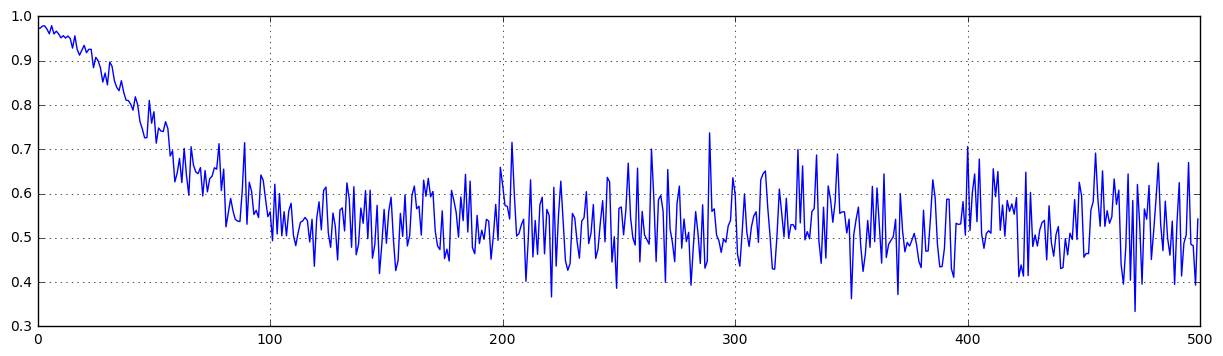

In [16]:
# plot the error through the iterations of the algorithm
pl.figure(figsize=(15,4))
pl.plot(MSE)
pl.grid()

## Testing
Now, let's use the trained network to predict the classes in the dataset.
This section shows three different manners of showing the outputs of the network, and how to compare its output with the targets to evaluate the performance of the classification.

In [17]:
output = np.zeros(dataset.shape[0])
for i in np.arange(dataset.shape[0]):
    output[i] = nn.predict(input_data[i,:])

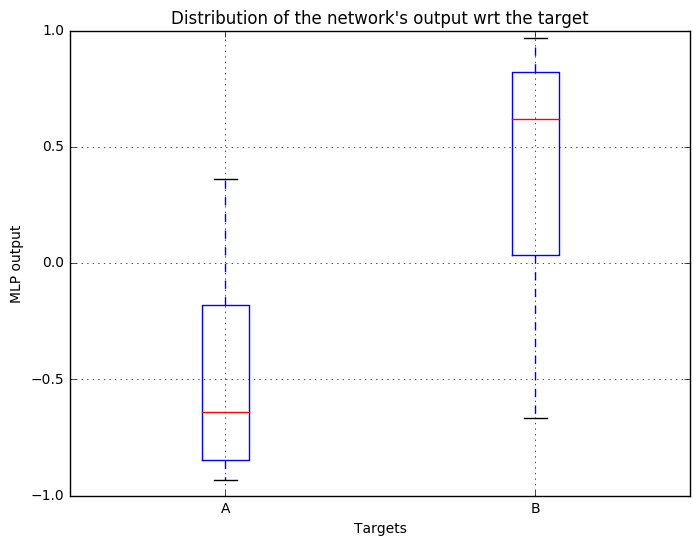

In [30]:
pl.figure(figsize=(8,6))
pl.boxplot([output[output_data==-1.0], output[output_data==1.0]])
pl.xticks([1, 2], ['A', 'B'])
pl.xlabel('Targets')
pl.ylabel('MLP output')
pl.title("Distribution of the network's output wrt the target")
pl.grid()

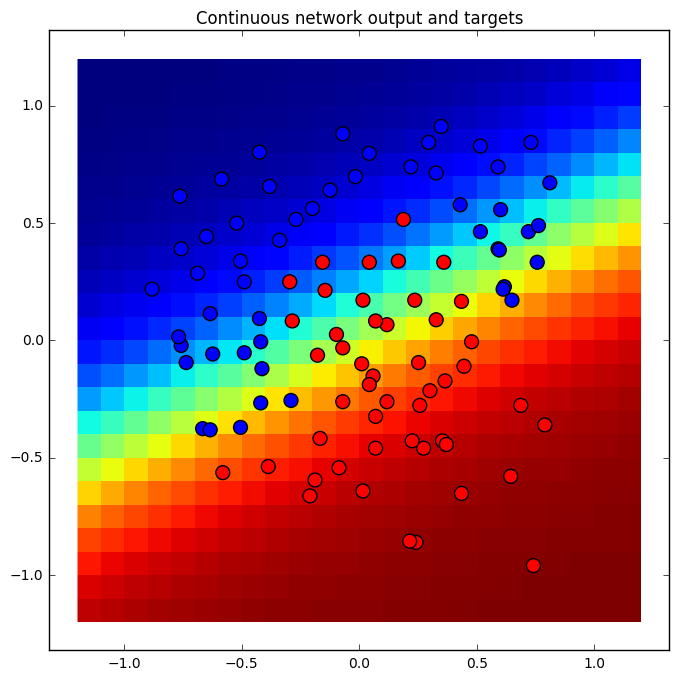

In [31]:
input_x = np.arange(-1.2, 1.2, 0.1)
input_y = np.arange(-1.2, 1.2, 0.1)
input_x_matrix, input_y_matrix = np.meshgrid(input_x, input_y)
inputs_xy = np.concatenate((input_x_matrix.flatten()[:,np.newaxis], input_y_matrix.flatten()[:,np.newaxis]), axis=1)

output_values = np.zeros(inputs_xy.shape[0])
for i in np.arange(inputs_xy.shape[0]):
    output_values[i] = nn.predict(inputs_xy[i,:])
output_matrix = np.reshape(output_values, input_x_matrix.shape)

pl.figure(figsize=(8,8))
pl.imshow(np.flipud(output_matrix), interpolation='None', extent=(-1.2,1.2,-1.2,1.2))
pl.scatter(input_data[:,0], input_data[:,1], c=[(['b', 'r'])[d>0] for d in output_data], s=100)
pl.title('Continuous network output and targets')

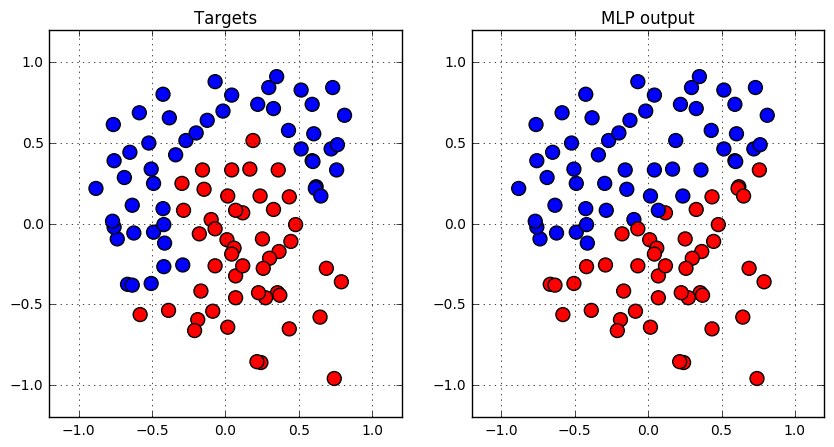

In [33]:
pl.figure(figsize=(10,5))
pl.subplot(1,2,1)
pl.scatter(input_data[:,0], input_data[:,1], c=[(['b', 'r'])[d>0] for d in output_data], s=100)
pl.xlim(-1.2, 1.2)
pl.ylim(-1.2, 1.2)
pl.grid()
pl.title('Targets')
pl.subplot(1,2,2)
pl.scatter(input_data[:,0], input_data[:,1], c=[(['b', 'r'])[d>0] for d in output], s=100)
pl.xlim(-1.2, 1.2)
pl.ylim(-1.2, 1.2)
pl.grid()
pl.title('MLP output')

## Exercise
Modify the class MLP provided in this notebook to include the momentum term in the function `fit`:

~~~
fit(self, X, y, learning_rate=0.1, momentum=0.5, epochs=100):
~~~

Modify the behaviour of the function accordingly. Use the `momentum` constant to modulate the previous Δw which has to be added to the current Δw.

Save the resulting code in a file named `mlp_backprop_momentum.py`. This file will be used in the next laboratory.
